In [1]:
# https://math.stackexchange.com/questions/3084805/tvd-numerical-solution-of-burgers-equation-with-sinusoidal-initial-data

In [29]:
import numpy as np
import math
import seaborn as sns

def minmod(a, b):
    return 0.5 * (np.sign(a) + np.sign(b)) * np.minimum(np.abs(a), np.abs(b))

def f(u):
    y = 0.5 * u**2
    yp = u
    return y, yp

def RHS(u, dx, viscosity_coeff):
    # Add a diffusion term
    diffusion_term = viscosity_coeff * (np.roll(u, 1) - 2 * u + np.roll(u, -1)) / dx**2
    
    ux = minmod((u - np.roll(u, 1)) / dx, (np.roll(u, -1) - u) / dx)
    uL = np.roll(u + 0.5 * dx * ux, 1)
    uR = u - 0.5 * dx * ux
    fL, fpL = f(uL)
    fR, fpR = f(uR)
    a = np.maximum(np.abs(fpL), np.abs(fpR))
    H = 0.5 * (fL + fR - a * (uR - uL))
    y = -(np.roll(H, -1) - H) / dx + diffusion_term
    return y

# Parameters
Nx = 200
Co = 0.2
tmax = 1  # Time range from 0 to 1
viscosity_coeff =(0.01/math.pi) # Adjust this value for desired viscosity

# Initialization
x = np.linspace(-1, 1, Nx)
t = 0
u = -1*np.sin(math.pi * x)  # Initial condition: sin(pi * x)
dx = x[1] - x[0]
dt = Co * dx / np.max(np.abs(u))

# Create a 2D array to store the results
nt = int(tmax / dt) + 1
uf = np.zeros((nt, Nx))
uf[0, :] = u  # Store initial condition

print(nt)
print(dt)
print(nt * dt)

# Time-stepping loop to compute and store the solution
for i in range(1, nt):
    u1 = u + dt * RHS(u, dx, viscosity_coeff)
    u = 0.5 * u + 0.5 * (u1 + dt * RHS(u1, dx, viscosity_coeff))
    uf[i, :] = u

# Now, uf contains the solution at each time step


498
0.0020101128725153656
1.001036210512652


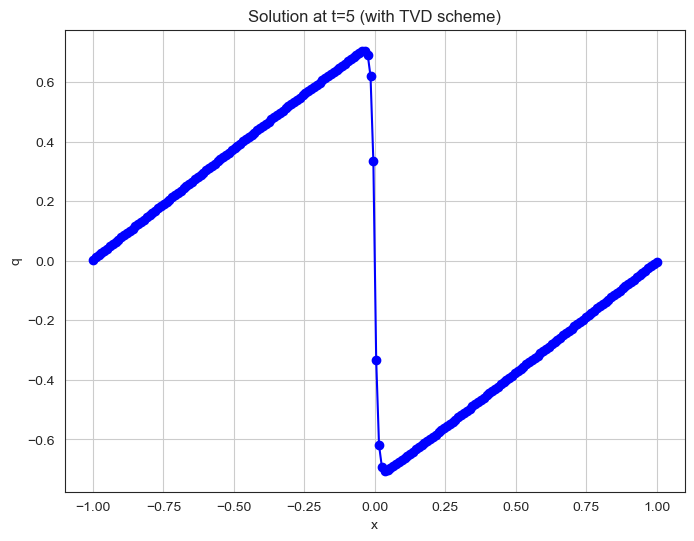

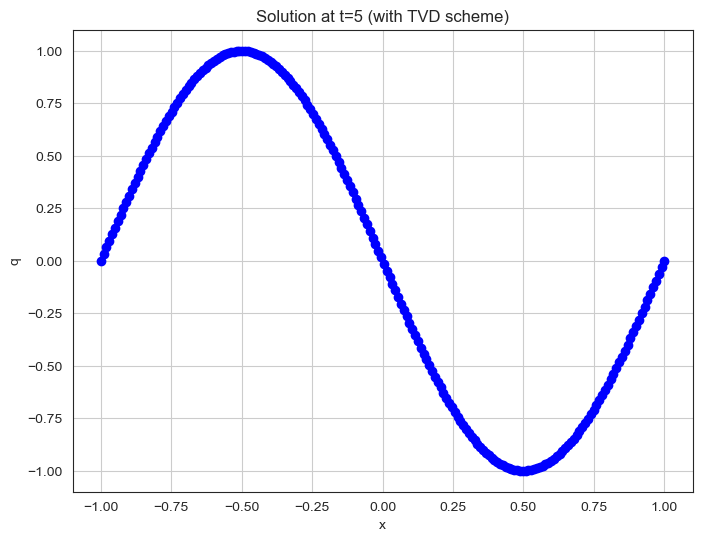

In [30]:
    
# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x, uf[-1], '-o', color='b')
plt.title('Solution at t=5 (with TVD scheme)')
plt.xlabel('x')
plt.ylabel('q')
plt.grid(True)
plt.show()

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(x, uf[0], '-o', color='b')
plt.title('Solution at t=5 (with TVD scheme)')
plt.xlabel('x')
plt.ylabel('q')
plt.grid(True)
plt.show()

In [31]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=3000)
sns.heatmap(uf.T, cmap='jet')

<Axes: >